## Do demographic characteristics and chronic diseases effect number of comorbidities?

### Relationship between comorbidities (using the dichotomous data) and the descriptive variables (gender, age, urban/rural, poverty rate; race – Hispanic/ non-Hispanic; education; employment rate; household income)

%’s, provide cross tabs and calculate one-way ANOVA , reporting significance

Further analysis: Logistic regression or other modeling strategies

Proxy data from ACS at the county level 



In [111]:
import pandas as pd
import numpy as np
from scipy import stats
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

In [2]:
med = pd.read_csv('../../data/claims.csv')
reshaped_med = pd.read_csv('../../data/reshaped_med.csv')
reshaped_med.head()

D:\Users\vhsu\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (59) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,member_id,year,age,gender,postal_code,county,urban_rural,binary_asthma,binary_bp,binary_cancer,...,claims_copd,claims_diabetes,claims_kidney,claims_mental_disorder,claims_musculoskeletal,claims_obesity,flag_comorbidity,flag_nonused,total_claims,total_conditions
0,710087KT90EY0DZUV,2018,47,F,98335,PIERCE,urban,1,0,0,...,1,0,0,0,0,1,1,0,1,2
1,71008ADZ2VBBDM14C,2016,54,F,98032,KING,urban,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,7100UNBYH5SYEX19X,2016,63,F,98926,KITTITAS,rural,0,0,0,...,0,0,0,0,0,0,0,0,3,0
3,7100UNBYH5SYEX19X,2018,65,F,98926,KITTITAS,rural,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,71069K607Y1CQ9BV5,2016,70,M,98059,KING,urban,0,0,0,...,0,0,0,0,0,0,0,0,2,0


In [85]:
def code_chronic_disease (group):
    df = pd.DataFrame()
    df['member_id'] = group.head(1)['member_id']
    df['gender'] = group.head(1)['gender']
    df['age'] = group['age'].max()
    df['urban_rural'] = group.head(1)['urban_rural']
    if any(group['flag_comorbidity'] == 1):
        df['chronic_disease'] = 2
    elif any(group['total_conditions'] == 1):
        df['chronic_disease'] = 1
    else:
        df['chronic_disease'] = 0
    return df

In [86]:
comorbid = reshaped_med.groupby('member_id', as_index=False).apply(code_chronic_disease)

In [87]:
comorbid.head()

,,member_id,gender,age,urban_rural,chronic_disease
0,0,710087KT90EY0DZUV,F,47,urban,2
1,1,71008ADZ2VBBDM14C,F,54,urban,0
2,2,7100UNBYH5SYEX19X,F,65,rural,0
3,4,71069K607Y1CQ9BV5,M,72,urban,2
4,7,7107GY7V3ZWGK7FKP,F,58,rural,2


## Percentages

### Gender %'s

In [58]:
gender_comorbid = comorbid.loc[comorbid['chronic_disease'] == 2].groupby('gender').size()
gender = comorbid.groupby('gender').size()

In [59]:
gender_pct = gender_comorbid/gender
gender_pct

gender
F    0.246434
M    0.299874
dtype: float64

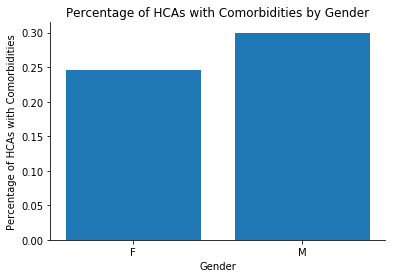

In [60]:
ax = plt.subplot()
ax.bar(gender_pct.index, gender_pct)
ax.set_xlabel('Gender')
ax.set_ylabel('Percentage of HCAs with Comorbidities')
ax.set_title('Percentage of HCAs with Comorbidities by Gender')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

### Age %'s

In [105]:
def age_buckets(row):
    if (row['age'] >= 18 and row['age'] <=29):
        age_bucket = '18-29'
    elif (row['age'] >= 30 and row['age'] <= 39):
        age_bucket = '30-39'
    elif (row['age'] >= 40 and row['age'] <= 49):
        age_bucket = '40-49'
    elif (row['age'] >= 50 and row['age'] <= 59):
        age_bucket = '50-59'
    elif (row['age'] >= 60 and row['age'] <= 69):
        age_bucket = '60-69'
    elif (row['age'] >= 70):
        age_bucket = '70+'
    return age_bucket

In [106]:
comorbid['age_bucket'] = comorbid.apply(age_buckets, axis=1)

In [107]:
comorbid.head()

,,member_id,gender,age,urban_rural,chronic_disease,age_bucket
0,0,710087KT90EY0DZUV,F,47,urban,2,40-49
1,1,71008ADZ2VBBDM14C,F,54,urban,0,50-59
2,2,7100UNBYH5SYEX19X,F,65,rural,0,60-69
3,4,71069K607Y1CQ9BV5,M,72,urban,2,70+
4,7,7107GY7V3ZWGK7FKP,F,58,rural,2,50-59


In [108]:
age_comorbid = comorbid.loc[comorbid['chronic_disease'] == 2].groupby('age_bucket').size()
age = comorbid.groupby('age_bucket').size()

In [109]:
age_pct = age_comorbid/age

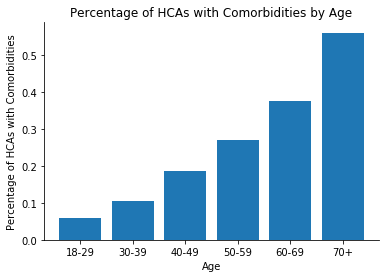

In [110]:
ax = plt.subplot()
ax.bar(age_pct.index, age_pct)
ax.set_xlabel('Age')
ax.set_ylabel('Percentage of HCAs with Comorbidities')
ax.set_title('Percentage of HCAs with Comorbidities by Age')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

### Urban/Rural %'s

In [67]:
urban_rural_comorbid = comorbid.loc[comorbid['chronic_disease'] == 2].groupby('urban_rural').size()
urban_rural = comorbid.groupby('urban_rural').size()

In [68]:
urban_rural_pct = urban_rural_comorbid/urban_rural
urban_rural_pct

urban_rural
rural    0.297979
urban    0.230422
dtype: float64

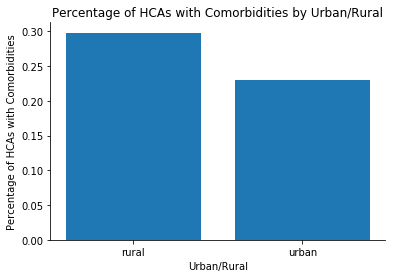

In [69]:
ax = plt.subplot()
ax.bar(urban_rural_pct.index, urban_rural_pct)
ax.set_xlabel('Urban/Rural')
ax.set_ylabel('Percentage of HCAs with Comorbidities')
ax.set_title('Percentage of HCAs with Comorbidities by Urban/Rural')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

## Crosstabs

In [71]:
gender_crosstab = pd.crosstab(comorbid['chronic_disease'], comorbid['gender'])
gender_crosstab

gender,F,M
chronic_disease,,
0,5609,727
1,2421,382
2,2626,475


In [72]:
gender_crosstab_pct = pd.crosstab(comorbid['chronic_disease'], comorbid['gender']).apply(lambda r: r/r.sum(), axis=1)
gender_crosstab_pct

gender,F,M
chronic_disease,,
0,0.885259,0.114741
1,0.863717,0.136283
2,0.846824,0.153176


In [73]:
age_crosstab = pd.crosstab(comorbid['chronic_disease'], comorbid['age'])
age_crosstab.head()

age,18,19,20,21,22,23,24,25,26,27,...,81,82,83,84,85,86,87,88,89,93
chronic_disease,,,,,,,,,,,,,,,,,,,,,
0,0,19,35,58,58,77,80,91,112,124,...,2,0,2,0,1,0,0,0,0,0
1,2,4,10,4,18,26,27,22,35,36,...,2,4,0,1,0,1,0,0,1,1
2,0,1,1,5,0,3,11,7,18,11,...,4,5,3,3,3,2,1,2,3,0


In [74]:
age_crosstab_pct = pd.crosstab(comorbid['chronic_disease'], comorbid['age']).apply(lambda r: r/r.sum(), axis=1)
age_crosstab_pct

age,18,19,20,21,22,23,24,25,26,27,...,81,82,83,84,85,86,87,88,89,93
chronic_disease,,,,,,,,,,,,,,,,,,,,,
0,0.000000,0.002999,0.005524,0.009154,0.009154,0.012153,0.012626,0.014362,0.017677,0.019571,...,0.000316,0.000000,0.000316,0.000000,0.000158,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000714,0.001427,0.003568,0.001427,0.006422,0.009276,0.009633,0.007849,0.012487,0.012843,...,0.000714,0.001427,0.000000,0.000357,0.000000,0.000357,0.000000,0.000000,0.000357,0.000357
2,0.000000,0.000322,0.000322,0.001612,0.000000,0.000967,0.003547,0.002257,0.005805,0.003547,...,0.001290,0.001612,0.000967,0.000967,0.000967,0.000645,0.000322,0.000645,0.000967,0.000000


In [75]:
urban_rural_crosstab = pd.crosstab(comorbid['chronic_disease'], comorbid['urban_rural'])
urban_rural_crosstab

urban_rural,rural,urban
chronic_disease,,
0,1957,4344
1,995,1788
2,1253,1836


In [76]:
urban_rural_crosstab_pct = pd.crosstab(comorbid['chronic_disease'], comorbid['urban_rural']).apply(lambda r: r/r.sum(), axis=1)
urban_rural_crosstab_pct

urban_rural,rural,urban
chronic_disease,,
0,0.310586,0.689414
1,0.357528,0.642472
2,0.405633,0.594367


## ANOVA

In [78]:
female = comorbid.loc[comorbid['gender'] == 'F']
male = comorbid.loc[comorbid['gender'] == 'M']
F_gender, p_gender = stats.f_oneway(female['chronic_disease'], male['chronic_disease'])
print('F-value: ', F_gender)
print('p-value: ', p_gender)

F-value:  28.785229061354467
p-value:  8.233909998007912e-08


In [79]:
age_groups = [col for col_name, col in comorbid.groupby('age')['chronic_disease']]
F_age, p_age = stats.f_oneway(*age_groups)
print('F-value: ', F_age)
print('p-value: ', p_age)

F-value:  17.000223653824925
p-value:  7.574897960589955e-198


In [80]:
urban = comorbid.loc[comorbid['urban_rural'] == 'urban']
rural = comorbid.loc[comorbid['urban_rural'] == 'rural']
F_urban_rural, p_urban_rural = stats.f_oneway(urban['chronic_disease'], rural['chronic_disease'])
print('F-value: ', F_urban_rural)
print('p-value: ', p_urban_rural)

F-value:  85.73259750017189
p-value:  2.4022694842349433e-20


## Logistic Regression

In [119]:
def code_comorbid (group):
    df = pd.DataFrame()
    df['gender'] = group.head(1)['gender']
    df['age'] = group['age'].max()
    df['urban_rural'] = group.head(1)['urban_rural']
    df['binary_asthma'] = group['binary_asthma'].max()
    df['binary_bp'] = group['binary_bp'].max()
    df['binary_cancer'] = group['binary_cancer'].max()
    df['binary_cardiovascular'] = group['binary_cardiovascular'].max()
    df['binary_cholesterol'] = group['binary_cholesterol'].max()
    df['binary_copd'] = group['binary_copd'].max()
    df['binary_diabetes'] = group['binary_diabetes'].max()
    df['binary_kidney'] = group['binary_kidney'].max()
    df['binary_mental_disorder'] = group['binary_mental_disorder'].max()
    df['binary_musculoskeletal'] = group['binary_musculoskeletal'].max()
    df['binary_obesity'] = group['binary_obesity'].max()    
    df['flag_comorbidity'] = group['flag_comorbidity'].max()
    return df

In [128]:
sample = reshaped_med.dropna()
sample = sample.loc[sample['total_conditions'] >= 1]
sample = sample.groupby('member_id', as_index=False).apply(code_comorbid)
gender = {'M': 1,'F': 0} 
urban = {'urban': 1,'rural': 0}
sample['gender'] = [gender[item] for item in sample['gender']] 
sample['urban_rural'] = [urban[item] for item in sample['urban_rural']] 
sample.head()

,,gender,age,urban_rural,binary_asthma,binary_bp,binary_cancer,binary_cardiovascular,binary_cholesterol,binary_copd,binary_diabetes,binary_kidney,binary_mental_disorder,binary_musculoskeletal,binary_obesity,flag_comorbidity
0,0,0,47,1,1,0,0,0,0,1,0,0,0,0,1,1
1,5,1,72,1,0,1,0,1,1,1,1,0,0,0,0,1
2,7,0,57,0,0,1,0,0,1,0,0,0,0,0,0,1
3,12,1,70,0,0,1,0,0,1,0,0,0,0,0,0,1
4,14,0,44,0,0,1,0,1,0,0,0,0,0,0,0,1


In [129]:
def binary_age_buckets(row):
    if (row['age'] >= 18 and row['age'] <=29):
        age_bucket = 0
    elif (row['age'] >= 30 and row['age'] <= 39):
        age_bucket = 1
    elif (row['age'] >= 40 and row['age'] <= 49):
        age_bucket = 2
    elif (row['age'] >= 50 and row['age'] <= 59):
        age_bucket = 3
    elif (row['age'] >= 60 and row['age'] <= 69):
        age_bucket = 4
    elif (row['age'] >= 70):
        age_bucket = 5
    return age_bucket

In [130]:
mental_disorder_reference = sample['binary_mental_disorder']
sample = sample.loc[:, sample.columns != 'binary_mental_disorder']
sample['age'] = sample.apply(binary_age_buckets, axis=1)
age_reference = sample.loc[sample['age'] == 0]
sample = sample.loc[sample['age'] != 0]
sample.head()

,,gender,age,urban_rural,binary_asthma,binary_bp,binary_cancer,binary_cardiovascular,binary_cholesterol,binary_copd,binary_diabetes,binary_kidney,binary_musculoskeletal,binary_obesity,flag_comorbidity
0,0,0,2,1,1,0,0,0,0,1,0,0,0,1,1
1,5,1,5,1,0,1,0,1,1,1,1,0,0,0,1
2,7,0,3,0,0,1,0,0,1,0,0,0,0,0,1
3,12,1,5,0,0,1,0,0,1,0,0,0,0,0,1
4,14,0,2,0,0,1,0,1,0,0,0,0,0,0,1


In [131]:
independent = sample.loc[:, sample.columns != 'flag_comorbidity']
dependent = sample['flag_comorbidity']

In [132]:
reg = LogisticRegression().fit(independent, dependent)

D:\Users\vhsu\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
